### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
male_data=pd.read_csv('male_complete.csv')

In [3]:
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [4]:
male_swim = male_data[male_data['Sport'] == 'Basketball']

In [5]:
male_swim['Sport'].describe

<bound method NDFrame.describe of 4367    Basketball
4368    Basketball
4369    Basketball
4370    Basketball
4371    Basketball
           ...    
5079    Basketball
5080    Basketball
5081    Basketball
5082    Basketball
5083    Basketball
Name: Sport, Length: 717, dtype: object>

In [6]:
male_swim['Medal'].describe

<bound method NDFrame.describe of 4367        NA
4368      Gold
4369    Bronze
4370        NA
4371        NA
         ...  
5079        NA
5080    Bronze
5081        NA
5082        NA
5083        NA
Name: Medal, Length: 717, dtype: object>

In [7]:
male_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 4367 to 5083
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      717 non-null    int64  
 1   Unnamed: 0_x    717 non-null    int64  
 2   ID              717 non-null    int64  
 3   Name            717 non-null    object 
 4   Sex             717 non-null    object 
 5   Age             717 non-null    float64
 6   Height          717 non-null    float64
 7   Weight          717 non-null    float64
 8   NOC             717 non-null    object 
 9   Games           717 non-null    object 
 10  Year            717 non-null    int64  
 11  Season          717 non-null    object 
 12  City            717 non-null    object 
 13  Sport           717 non-null    object 
 14  Event           717 non-null    object 
 15  Medal           717 non-null    object 
 16  Team            717 non-null    object 
 17  Unnamed: 0_y    717 non-null   

In [8]:
# Extract Response and Predictors
y = pd.DataFrame(male_swim["Medal"]).astype('category')
X = pd.DataFrame(male_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [9]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (537, 1) (537, 6)
Test Set  : (180, 1) (180, 6)


In [10]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [11]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
4981,26.0,110.0,204.0,2.264993e+10,3377075.0,6706.966998,NA
4919,26.0,98.0,200.0,1.800000e+12,57685327.0,31203.775615,Silver
4681,26.0,92.0,197.0,5.262328e+10,3857700.0,13641.102718,NA
4892,24.0,92.0,195.0,4.785055e+10,3198231.0,14961.568176,NA
4657,27.0,106.0,213.0,3.750000e+12,82110097.0,45670.388138,NA
...,...,...,...,...,...,...,...
4879,22.0,93.0,205.0,2.790000e+11,29900000.0,9331.103679,NA
4557,23.0,102.0,209.0,2.410000e+11,10955141.0,21998.804032,NA
4607,29.0,95.0,185.0,3.750000e+12,82110097.0,45670.388138,NA
4911,27.0,105.0,203.0,1.060000e+12,21249200.0,49884.230936,NA


In [12]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        537
Gold       60
Bronze     60
Silver     60
Name: Medal, dtype: int64


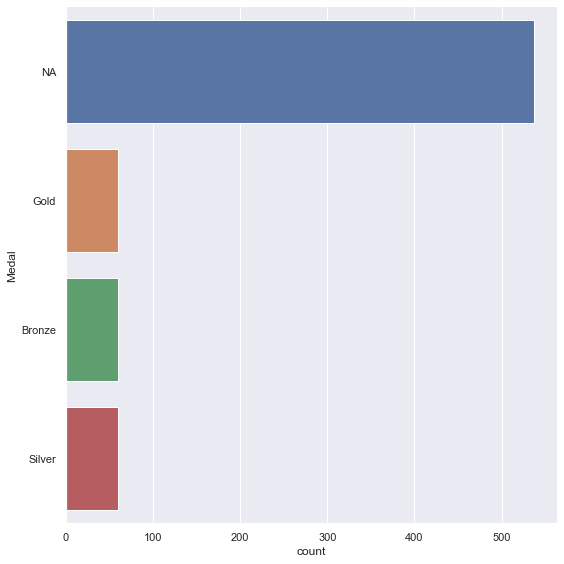

In [13]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(male_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(male_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = male_swim, kind = "count", height = 8)

In [14]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(537, 6) (537, 1)


In [15]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1632, 6) (1632, 1)


In [16]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,26.000000,110.000000,204.000000,2.264993e+10,3377075.0,6706.966998,NA
1,26.000000,98.000000,200.000000,1.800000e+12,57685327.0,31203.775615,Silver
2,26.000000,92.000000,197.000000,5.262328e+10,3857700.0,13641.102718,NA
3,24.000000,92.000000,195.000000,4.785055e+10,3198231.0,14961.568176,NA
4,27.000000,106.000000,213.000000,3.750000e+12,82110097.0,45670.388138,NA
...,...,...,...,...,...,...,...
1627,25.550432,97.706050,201.458211,3.829985e+10,7057412.0,5426.897946,Silver
1628,28.769763,91.731967,196.384882,1.370000e+12,60912498.0,22491.279212,Silver
1629,27.559495,92.660758,193.101263,1.370000e+12,60912498.0,22491.279212,Silver
1630,23.790667,120.067259,211.945778,1.640000e+12,45954106.0,35687.779455,Silver


In [17]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
4922,28.0,96.0,202.0,1.370000e+12,60912498.0,22491.279212
4766,31.0,103.0,198.0,4.273888e+10,2872298.0,14879.680299
4989,30.0,85.0,186.0,5.071496e+10,4170600.0,12160.110629
4476,25.0,93.0,195.0,9.129595e+09,16440924.0,555.296942
4688,27.0,101.0,204.0,2.410000e+11,10955141.0,21998.804032
...,...,...,...,...,...,...
4889,25.0,106.0,213.0,2.486148e+10,7463157.0,3331.228766
4665,34.0,100.0,199.0,5.460000e+11,42096739.0,12970.125786
4483,28.0,110.0,203.0,2.790000e+11,29900000.0,9331.103679
5002,29.0,90.0,195.0,3.829985e+10,7057412.0,5426.897946


Number of Medal Types : 4
Bronze    408
Gold      408
NA        408
Silver    408
Name: Medal, dtype: int64


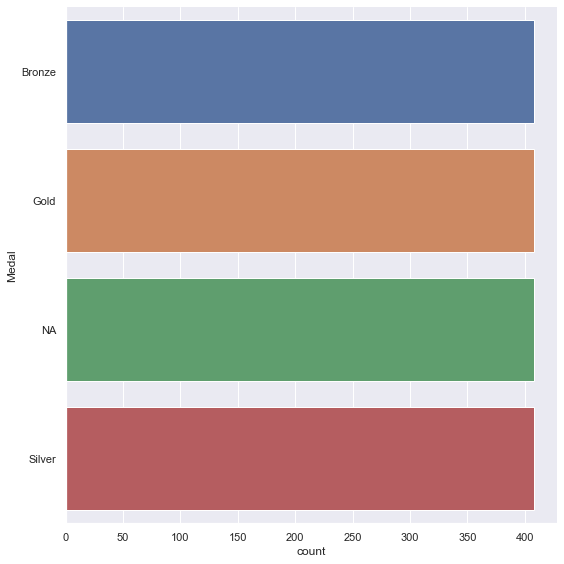

In [18]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1224, 1) (1224, 6)
Test Set  : (408, 1) (408, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 1.0



<AxesSubplot:>

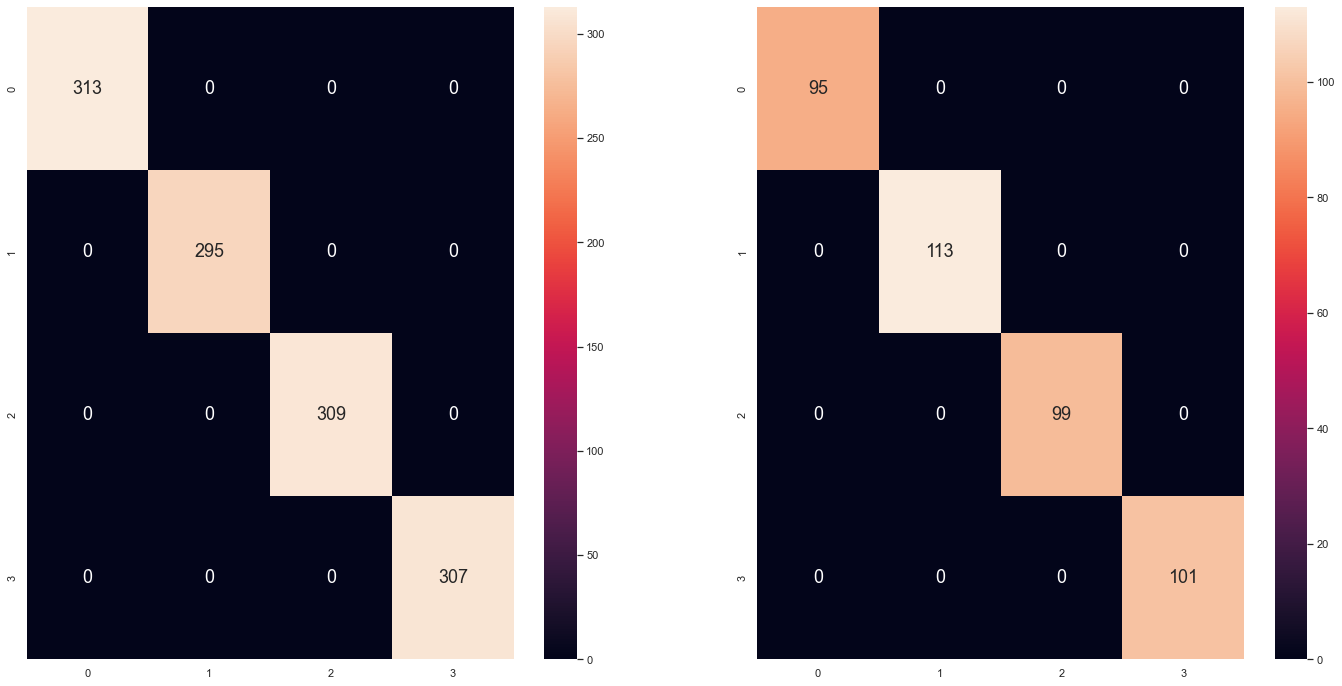

In [19]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

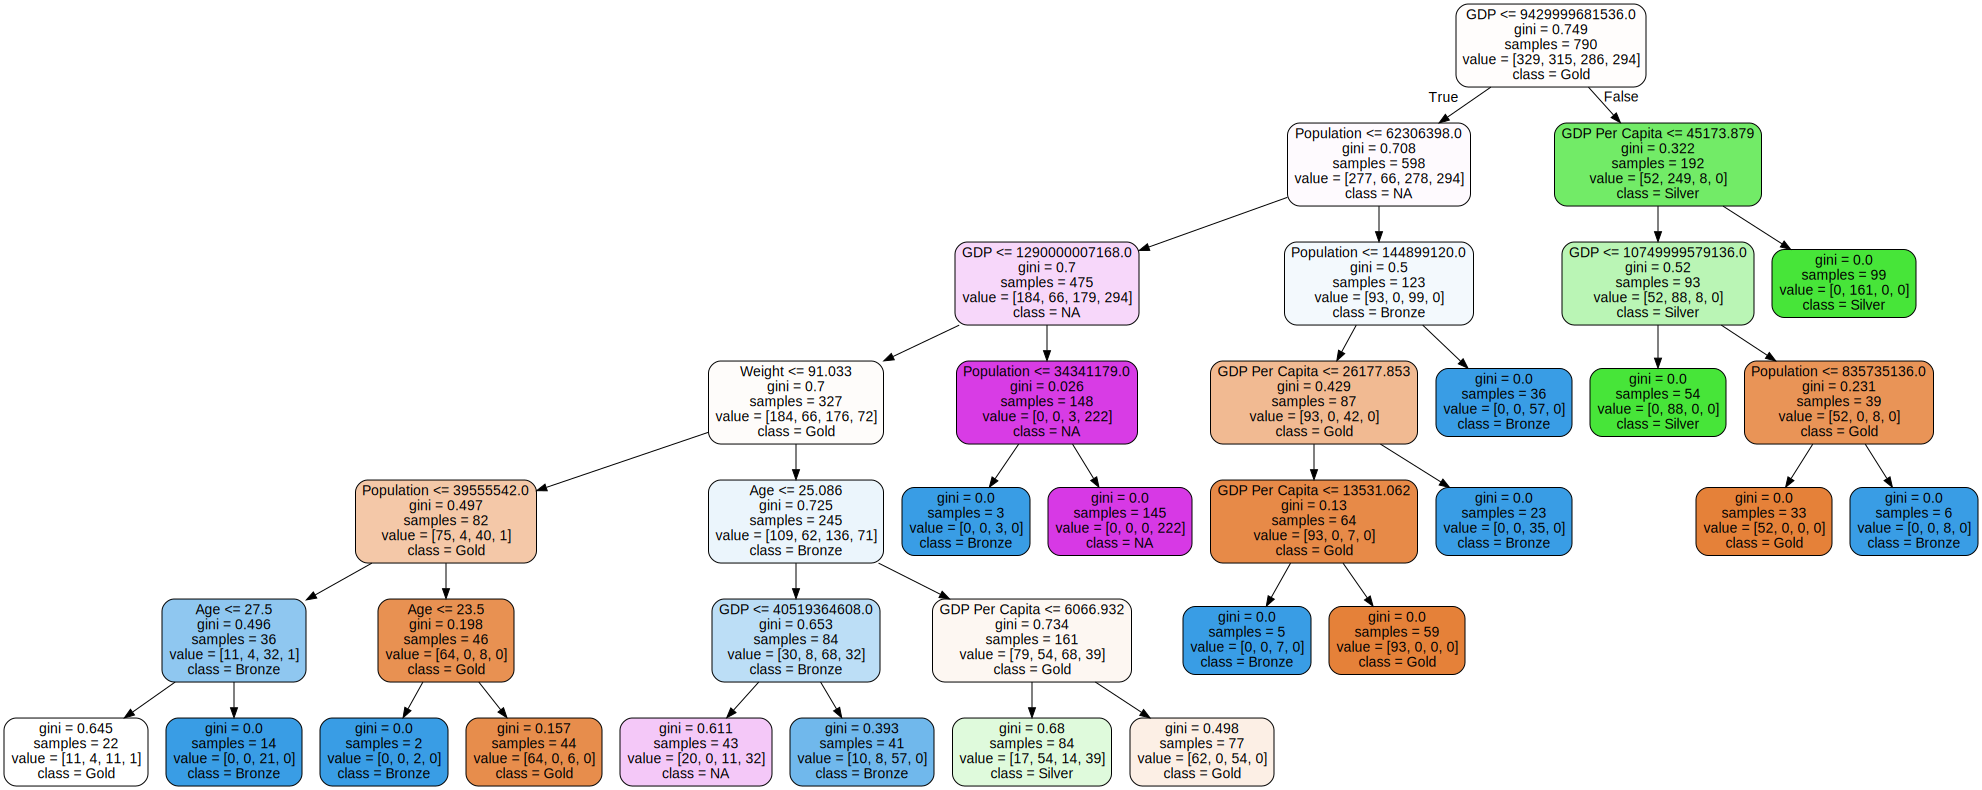

In [20]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [21]:
#graph.render("Tree_new")

### Predictions

In [22]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 1.0


<AxesSubplot:>

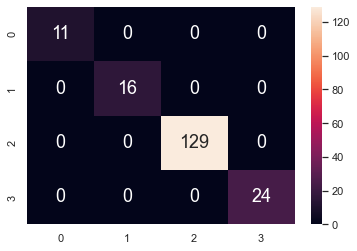

In [23]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})